#### Text Analysis 실습
- **TF-IDF & Cosine similarity**을 이용하여 텍스트 간 유사도 계산하기

<br>
<br>

#### 1. 두 개의 영화 리뷰 텍스트 간 유사도 계산하기

#### 1) The Shawshank Redemption (1994) & The Godfather (1972)

In [1]:
# 유사도 분석에 필요한 패키지를 불러온다
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
file = open('shawshank.txt', 'r', encoding = 'utf-8')
lines = file.readlines()  # 영화 리뷰 파일의 모든 라인을 읽어와 리스트로 저장
doc1 = ' '.join(lines)
# doc1 = ''  # 리뷰 데이터를 담기 위한 String 변수 생성
# for line in lines:  # for문을 통해 lines에 있는 모든 텍스트를 doc1에 이어 붙임
#     doc1 += line

file = open('godfather.txt', 'r', encoding = 'utf-8')
lines = file.readlines()  # 영화 리뷰 파일의 모든 라인을 읽어와 리스트로 저장
doc2 = ' '.join(lines)

In [3]:
corpus = [doc1, doc2]  # doc1, doc2를 합쳐 corpus list를 생성
# corpus[0]

In [4]:
vectorizer = TfidfVectorizer()  # TfidfVectorizer() 객체 변수 생성

In [5]:
# fit_transform()를 통해 corpus의 텍스트 데이터를 벡터화해 X에 저장하고 X를 dense한 matrix로 변환
# raw counts have been normalized against document length, terms that are found across many docs are weighted down.

X = vectorizer.fit_transform(corpus).todense()
# X = vectorizer.fit_transform(corpus) # .todense() 함수를 실행하지 않더라도 코사인 유사도 계산에는 차이가 없음

# .todense()의 역할 : 기본적으로 fit_transform의 결과로 만들어지는 행렬은 희소행렬(Sparse matrix), 
# 희소행렬 내에는 무수히 많은 '0'이 존재하는데 이러한 '0'이라는 값을 저장하는 것 역시도 공간(메모리)을 차지하므로, 
# '0'인 값들은 아예 제외하고 나머지 숫자들만 실제로 저장하는 방식으로 처리함 (ex. 0이 아닌 값만 [행/열/값] 쌍으로 저장하는 방식 등)
# 이렇게 저장된 데이터로부터 현재 우리가 얻어내야하는 것은 값이 모두 채워진 행렬(Dense matrix)이므로,
# 마지막에 .todense() 함수를 실행 시 Sparse matrix로부터 2행 3276열 크기의 Dense matrix를 만들어 돌려받을 수 있음 
# (추가 참고 : Scipy sparse matrix handling @ https://j.mp/32mhwGq)

# X = vectorizer.fit_transform(corpus)
# print(X[0]) # .todense() 적용 전의 희소행렬(Sparse matrix)

In [6]:
print(X)

[[0.0071001  0.00332632 0.         ... 0.         0.00166316 0.        ]
 [0.00889703 0.         0.00138938 ... 0.00138938 0.         0.00138938]]


In [7]:
print(type(X))
print(X.shape) # X.shape = (row, column)
# 모양 확인 : 2행 3276열의 행렬 (각 행은 각 영화 리뷰 데이터의 word(열) 출현 빈도에 대한 dense matrix)

<class 'numpy.matrix'>
(2, 3276)


In [8]:
#import pandas as pd

#pd.DataFrame(X) # np.array or np.matrix => pd.DataFrame

In [9]:
X[ 0 ]

matrix([[0.0071001 , 0.00332632, 0.        , ..., 0.        , 0.00166316,
         0.        ]])

In [11]:
print("Similarity between 'The Shawshank Redemption' and 'The Godfather': ", cosine_similarity(X[0], X[1])) # 코사인 유사도

Similarity between 'The Shawshank Redemption' and 'The Godfather':  [[0.9437827]]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


<br>

#### 2) The Shawshank Redemption (1994) & Inception (2010)

In [12]:
with open('shawshank.txt', 'r', encoding = 'utf-8') as f: 
    lines = f.readlines()  # 영화 리뷰 파일의 모든 라인을 읽어와 리스트로 저장
    doc1 = ' '.join(lines)
    
with open('inception.txt', 'r', encoding= 'utf-8') as f:  
    lines = f.readlines()  # 영화 리뷰 파일의 모든 라인을 읽어와 리스트로 저장
    doc2 = ' '.join(lines)
    
corpus = [doc1, doc2]  # doc1, doc2를 합쳐 corpus list를 생성
vectorizer = TfidfVectorizer()  # TfidfVectorizer() 객체 변수 생성
X = vectorizer.fit_transform(corpus).todense() # fit_transform()를 통해 corpus의 텍스트 데이터를 벡터화해 X에 저장하고 X를 dense한 matrix로 변환

print("Similarity between 'The Shawshank Redemption' and 'Inception': ", cosine_similarity(X[0], X[1]))

Similarity between 'The Shawshank Redemption' and 'Inception':  [[0.19704257]]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


<br>
<br>

#### 2. 여러 영화 리뷰 텍스트 간 유사도 계산하기

In [13]:
file = open('shawshank.txt', 'r', encoding = 'utf-8')
lines = file.readlines()  
doc1 = ' '.join(lines)

file = open('godfather.txt', 'r', encoding = 'utf-8')
lines = file.readlines()  
doc2 = ' '.join(lines)

file = open('inception.txt', 'r', encoding = 'utf-8')
lines = file.readlines()
doc3 = ' '.join(lines)

In [14]:
corpus = [doc1, doc2, doc3]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).todense() 

In [15]:
# 영화 간 cosine similarity 계산
print("Similarity between 'The Shawshank Redemption' and 'The Godfather': ", cosine_similarity(X[0], X[1]))
print("Similarity between 'The Shawshank Redemption' and 'Inception': ", cosine_similarity(X[0], X[2]))
print("Similarity between 'The Godfather' and 'Inception': ", cosine_similarity(X[1], X[2]))

Similarity between 'The Shawshank Redemption' and 'The Godfather':  [[0.93484399]]
Similarity between 'The Shawshank Redemption' and 'Inception':  [[0.18080469]]
Similarity between 'The Godfather' and 'Inception':  [[0.16267018]]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np

<br>

#### + [ 하나의 행 vs 전체 행 ] 구도로 Cosine similarity 계산


In [0]:
#cosine_similarity( X[0] , X ) 

In [17]:
import pandas as pd
pd.DataFrame( cosine_similarity(X[0], X).T ) # T == Transpose (전치 행렬)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


,0
0,1.000000
1,0.934844
2,0.180805


<br>

#### + [ 각 행 vs 전체 행 ] 구도로 Cosine similarity 계산

In [18]:
cosine_similarity( X , X ) 

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[1.        , 0.93484399, 0.18080469],
       [0.93484399, 1.        , 0.16267018],
       [0.18080469, 0.16267018, 1.        ]])

In [19]:
result = pd.DataFrame(cosine_similarity( X , X ))

result.columns = ['Shawshank', 'Godfather', 'Inception']
result.index = ['Shawshank', 'Godfather', 'Inception']

result

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


,Shawshank,Godfather,Inception
Shawshank,1.000000,0.934844,0.180805
Godfather,0.934844,1.000000,0.162670
Inception,0.180805,0.162670,1.000000


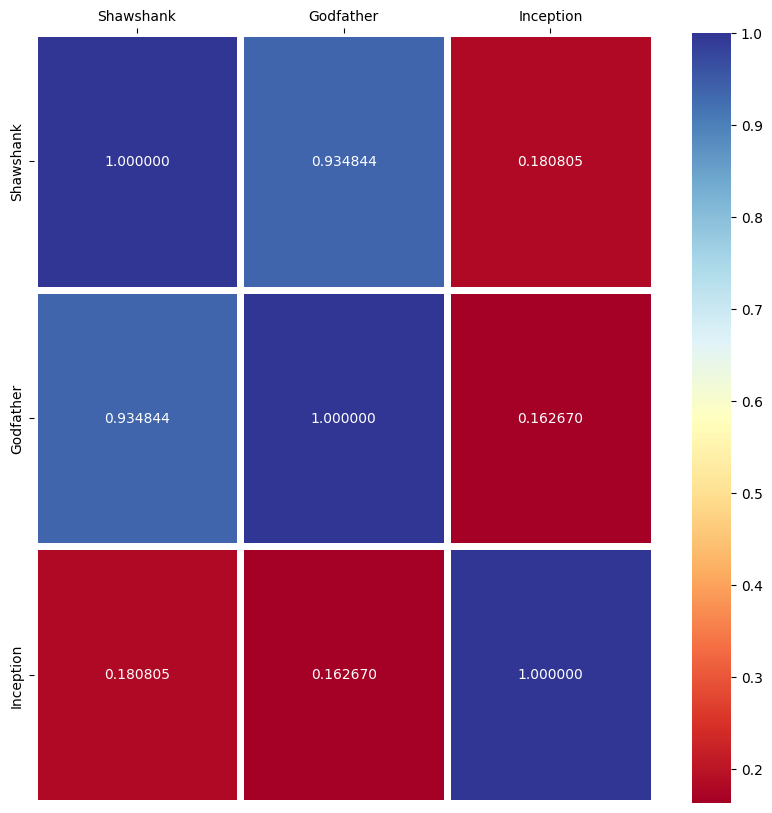

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

sns.heatmap(result, annot=True, fmt='f', linewidths=5, cmap='RdYlBu')

sns.set(font_scale=1.5)
plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False) # Let the horizontal axes labeling appear on top.
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53674883-1018-459e-80e4-3fe92d693a3d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>